# Milestone 1
Unsupervised learning and data analysis.

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import sklearn
import sklearn.preprocessing
import sklearn.metrics

In [38]:
df = pd.read_csv('dengue_features_train.csv')

## Filter data for group subset
Our group is working on dataset San Juan 1992-98

In [39]:
df['city'].value_counts()

sj    936
iq    520
Name: city, dtype: int64

In [40]:
#criteria = (df['city'].values == 'sj', df['year'].values >= 1992, df['year'].values <= 1998)
#df = df[np.sum(criteria, axis=0, dtype=np.int8) == 3]
df = df[df['city'] == 'sj']
df = df[df['year'] >= 1992]
df = df[df['year'] <= 1998]

In [41]:
df.drop(['city', 'year', 'weekofyear', 'week_start_date'], axis=1, inplace=True)
df.shape

(364, 20)

In [42]:
df.head()

ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
87  0.125100  0.157867  0.185283  0.181367                   NaN   
88  0.100833  0.073575  0.138714  0.112786                200.85   
89  0.222400  0.229900  0.198457  0.199414                  3.12   
90  0.122533  0.131050  0.188843  0.168871                  0.00   
91       NaN  0.048300  0.173671  0.191929                  0.00   

    reanalysis_air_temp_k  reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
87                    NaN                    NaN                          NaN   
88             297.912857             298.121429                   294.457143   
89             297.338571             297.485714                   294.467143   
90             297.091429             297.335714                   293.021429   
91             297.420000             297.550000                   292.718571   

    reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
87                        NaN                        NaN   
88                      300.4                      296.1   
89                      300.2                      295.6   
90                      299.5                      295.6   
91                      299.3                      295.5   

    reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
87                              NaN                                   NaN   
88                            18.30                             81.300000   
89                            19.80                             84.117143   
90                             5.11                             78.291429   
91                             6.50                             75.220000   

    reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
87                           NaN                                    NaN   
88                        200.85                              15.878571   
89                          3.12                              15.832857   
90                          0.00                              14.482857   
91                          0.00                              14.185714   

    reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
87                NaN                 NaN                      NaN   
88           2.300000           25.657143                 7.500000   
89           1.857143           25.471429                 6.171429   
90           2.357143           24.857143                 7.442857   
91           2.442857           24.800000                 6.585714   

    station_max_temp_c  station_min_temp_c  station_precip_mm  
87                 NaN                 NaN                NaN  
88                30.6                20.6               58.2  
89                31.1                21.7               32.3  
90                30.6                20.0                1.3  
91                28.9                20.0                9.2

# Fill NaN

In [43]:
df.isna().sum()
# ffill: propagate last valid observation forward to next valid backfill
# @ Check other methods
df.fillna(method="bfill", inplace=True)
df.isna().sum()

ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int64

# Correlation Matrix

<AxesSubplot:>

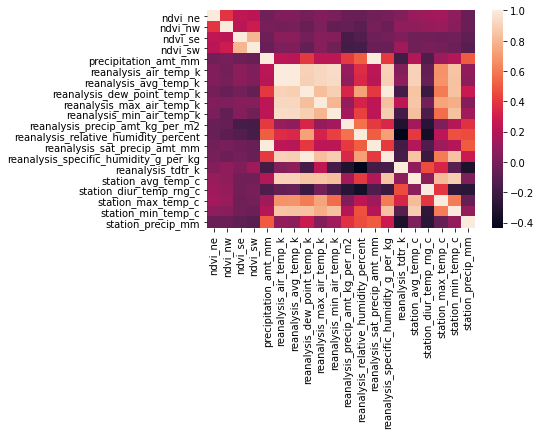

In [44]:
cor_mat = df.corr()
sns.heatmap(cor_mat)

# PCA
Normalize the data and apply find best principal components.

In [45]:
scaler = sklearn.preprocessing.StandardScaler()
#scaler = sklearn.preprocessing.MinMaxScaler()
X = scaler.fit_transform(df)

In [46]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)
X_pca.shape

(364, 20)

## Explained Variance Ratio Distribution

In [47]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[8.35552297e+00 3.36228510e+00 2.04042409e+00 1.57496014e+00
 1.13339565e+00 6.97789533e-01 6.53465393e-01 5.65216654e-01
 5.60319685e-01 3.87358997e-01 2.52572657e-01 1.81622212e-01
 1.41089977e-01 6.95739822e-02 4.48220257e-02 3.10063772e-02
 2.57661050e-03 1.01296500e-03 8.13894067e-05 2.79289361e-33]
[4.16628412e-01 1.67652403e-01 1.01740927e-01 7.85316665e-02
 5.65140964e-02 3.47936264e-02 3.25835079e-02 2.81831931e-02
 2.79390173e-02 1.93147412e-02 1.25939388e-02 9.05616247e-03
 7.03511838e-03 3.46914225e-03 2.23494441e-03 1.54605974e-03
 1.28476595e-04 5.05091064e-05 4.05829047e-06 1.39261041e-34]
[0.41662841 0.58428081 0.68602174 0.76455341 0.8210675  0.85586113
 0.88844464 0.91662783 0.94456685 0.96388159 0.97647553 0.98553169
 0.99256681 0.99603595 0.9982709  0.99981696 0.99994543 0.99999594
 1.         1.        ]


In [48]:
exp_cum_var = np.cumsum(pca.explained_variance_ratio_)
px.line(
    x=range(1, exp_cum_var.shape[0] + 1),
    y=exp_cum_var,
    labels={"x": "# Components", "y": "Explained Variance Ratio"}
)

In [49]:
X_pca.shape, X.shape

((364, 20), (364, 20))

# Outlier identification
DBSCAN

In [50]:
matsim = sklearn.metrics.pairwise_distances(X_pca)

In [51]:
fig = px.imshow(matsim)
fig.show()

In [52]:
from sklearn.neighbors import kneighbors_graph

In [53]:
minPts = 3

In [54]:
A = kneighbors_graph(X_pca, minPts, include_self=False)
Ar = A.toarray()

In [55]:
seq = []
for i in range(len(X_pca)): #enumerate(X_pca):
    for j in range(len(X_pca)):
        if Ar[i][j] != 0:
            seq.append(matsim[i][j])
seq.sort()

In [56]:
fig = px.line(x=np.arange(0, len(seq), 1), y=seq)
fig.show()

In [57]:
from sklearn.cluster import DBSCAN

In [58]:
results = []

for eps in np.arange(1.2, 5.0, 0.2):
    db = DBSCAN(eps, min_samples=minPts).fit(X_pca)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_outliers = list(labels).count(-1)
    results.append([eps, n_clusters_, n_outliers])
    
pd.DataFrame(results, columns=['eps','clusters','outliers']).set_index('eps')

clusters  outliers
eps                    
1.2         0       364
1.4         1       360
1.6         4       346
1.8         8       297
2.0         5       252
2.2         5       180
2.4         3       134
2.6         2        91
2.8         2        58
3.0         1        37
3.2         1        29
3.4         1        17
3.6         1        10
3.8         1         6
4.0         1         5
4.2         1         3
4.4         1         3
4.6         1         2
4.8         1         2

In [59]:
db = DBSCAN(eps=3.6, min_samples=minPts).fit(X_pca)

## Mark outliers

In [60]:
outliers = db.labels_

In [61]:
df2 = pd.DataFrame(X, columns=df.columns)
df2['outliers'] = outliers
df2.head()

ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
0  0.530314  1.137694  0.205411  0.283210              3.973221   
1  0.259283 -0.158180 -0.728994 -1.080920              3.973221   
2  1.617041  2.245112  0.469742  0.642191             -0.728024   
3  0.501647  0.725423  0.276834  0.034669             -0.802206   
4  0.267846 -0.546751 -0.027582  0.493295             -0.802206   

   reanalysis_air_temp_k  reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0              -0.889632              -0.820259                    -0.423367   
1              -0.889632              -0.820259                    -0.423367   
2              -1.402105              -1.396195                    -0.416638   
3              -1.622647              -1.532090                    -1.389428   
4              -1.329441              -1.337955                    -1.593214   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  ...  \
0                  -0.665856                  -0.881439  ...   
1                  -0.665856                  -0.881439  ...   
2                  -0.841044                  -1.301391  ...   
3                  -1.454199                  -1.301391  ...   
4                  -1.629386                  -1.385382  ...   

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                              0.495412                      3.973221   
1                              0.495412                      3.973221   
2                              1.343359                     -0.728024   
3                             -0.410155                     -0.802206   
4                             -1.334641                     -0.802206   

   reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
0                              -0.435831          -0.114195   
1                              -0.435831          -0.114195   
2                              -0.466672          -1.116979   
3                              -1.377453           0.015196   
4                              -1.577921           0.209284   

   station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
0           -1.104806                 0.705968           -0.800302   
1           -1.104806                 0.705968           -0.800302   
2           -1.244452                -0.893445           -0.485305   
3           -1.706359                 0.637176           -0.800302   
4           -1.749327                -0.394703           -1.871295   

   station_min_temp_c  station_precip_mm  outliers  
0           -1.418288           1.056174         0  
1           -1.418288           1.056174         0  
2           -0.650672           0.194759         0  
3           -1.836988          -0.836279         0  
4           -1.836988          -0.573531         0  

[5 rows x 21 columns]

### Visualize Data

In [62]:
px.scatter(x=X_pca[:,0], y=X_pca[:,1], color=outliers)

## Outliers characteristics

<AxesSubplot:>

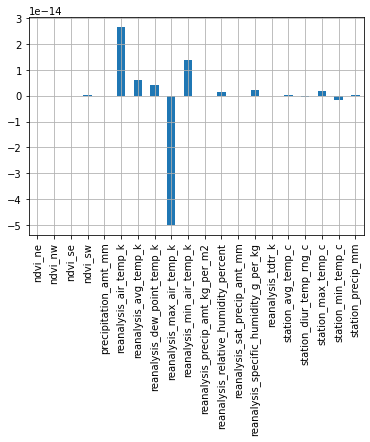

In [63]:
df2.drop('outliers', axis=1).mean().plot(kind='bar', grid=True)

<AxesSubplot:xlabel='outliers'>

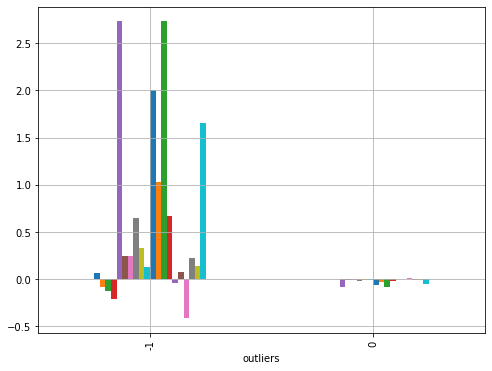

In [64]:
df2.groupby('outliers').mean().plot(kind='bar', legend=False, grid=True, figsize=(8,6))

## Filter outliers

In [65]:
X_clean = X_pca[df2['outliers'].values == 0]
X_clean.shape

(354, 20)

In [66]:
df_clean = df2[df2['outliers'] != -1]

# Clustering
Set the FILTERED flag to choose between clustering data with filtered outliers or including outliers.

In [67]:
# True => remove outliers
FILTERED = False

## K-means

In [68]:
if FILTERED:
    X_cluster = X_clean
else:
    X_cluster = X_pca

In [69]:
from sklearn.cluster import KMeans

In [70]:
inerts = []
silh = []
for i in range(2,20):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-4, random_state=None)
    labels = km.fit_predict(X_cluster)
    inerts.append(km.inertia_)
    silh.append(sklearn.metrics.silhouette_score(X_cluster, labels))

Maximize silhouette and minimize distortion.

In [71]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [72]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Line(x=np.arange(len(silh)), y=silh, name="Silhouette score"),
    secondary_y=False
)

fig.add_trace(
    go.Line(x=np.arange(len(inerts)), y=inerts, name="Distortion"),
    secondary_y=True
)

fig.update_yaxes(title_text="Silhouette", secondary_y=False)
fig.update_yaxes(title_text="Distortion", secondary_y=True)

fig.show()

/usr/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




### Create clusters

In [73]:
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-4, random_state=None)
labels = km.fit_predict(X_cluster)

In [74]:
if FILTERED:
    df_clean['k'] = labels
else:
    df2['k'] = labels

In [75]:
px.scatter(x=X_cluster[:,0], y=X_cluster[:,1], color=labels)

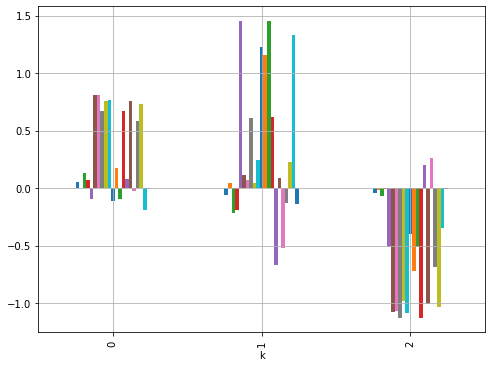

In [76]:
if FILTERED:
    df_clean.groupby('k').mean().plot(kind='bar', grid=True, legend=False, figsize=(8,6))
else:
    df2.groupby('k').mean().plot(kind='bar', grid=True, legend=False, figsize=(8,6))

## Hierarchical

### Set the FILTERED flag to choose between clustering data with filtered outliers or including outliers.

In [77]:
# True => remove outliers
FILTERED = True

if FILTERED:
    X_cluster = X_clean
    df_using = df_clean
else:
    X_cluster = X_pca
    df_using = df2

### Creating Dendogram

In [104]:
cut = 70

In [105]:
from scipy import cluster
import matplotlib.pyplot as plt

clusters = cluster.hierarchy.linkage(matsim, method='complete')

<ipython-input-105-f012256ca6b7>:4: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



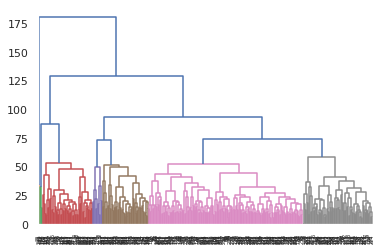

In [106]:
dend = cluster.hierarchy.dendrogram(clusters, color_threshold=cut)

f = plt.plot()
plt.show()

In [107]:
cluster_labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')
print(set(cluster_labels))
print(cluster_labels)

{1, 2, 3, 4, 5, 6, 7}
[4 4 7 3 3 3 7 7 7 7 7 7 7 7 6 6 7 3 6 6 1 4 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 5 5 6 6 6 7 7 6 6 6 7 3 7 7 3 3 3 7 3 7 3 3 2 7 7 7 7 7 7 6 6 7 6 5
 6 5 6 6 6 6 6 6 6 5 6 6 5 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 3 3 3 3
 3 3 3 7 3 3 7 7 7 7 7 6 6 6 6 6 6 6 6 6 6 6 6 5 6 6 6 6 5 5 6 6 6 5 5 5 6
 6 6 6 6 7 7 7 7 6 3 7 3 3 7 3 7 7 3 7 3 2 2 3 6 7 3 6 6 6 4 4 6 6 5 5 5 5
 5 5 6 6 5 6 6 5 5 5 5 6 6 6 6 5 6 6 6 6 6 6 7 3 7 7 7 3 3 7 7 4 3 7 7 7 7
 7 7 7 7 3 7 6 6 6 6 6 6 6 6 6 6 6 6 6 5 5 5 6 1 6 6 6 6 5 6 6 7 7 7 3 3 3
 3 6 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 6 6 6 6 6 6 6 5 6 6 6 6 6 6 6 6 6 6 6
 5 5 6 6 5 5 5 5 6 6 6 6 5 6 6 6 6 6 4 7 7 7 6 3 7 7 7 3 7 7 7 6 7 6 6 6 6
 6 6 5 6 6 5 6 5 6 5 5 5 5 5 5 6 5 5 4 5 5 6 4 5 6 5 6 7 4 6 6]


In [108]:
from sklearn import metrics
n_clusters_ = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print('Estimated number of clusters: {}'.format(n_clusters_))
print("Silhouette Coefficient: {:.3}".format(metrics.silhouette_score(X, cluster_labels)))

Estimated number of clusters: 7
Silhouette Coefficient: 0.0885


In [109]:
from sklearn.decomposition import PCA
pca = PCA (n_components = 2)
X_pca = pca.fit_transform(X)
print (pca.explained_variance_ratio_)

#plotting orginal points with color related to label
import plotly.express as px
fig = px.scatter(x=X_pca[:,0], y= X_pca[:,1], color = cluster_labels)

fig.show()

[0.41662841 0.1676524 ]


In [110]:
df.columns

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'group'],
      dtype='object')

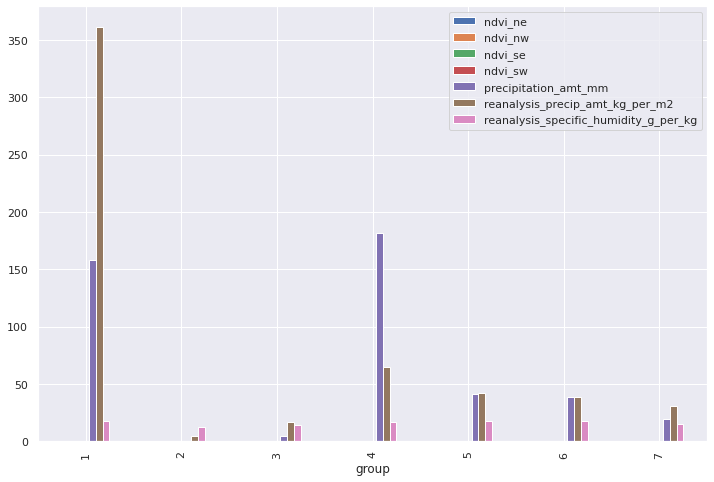

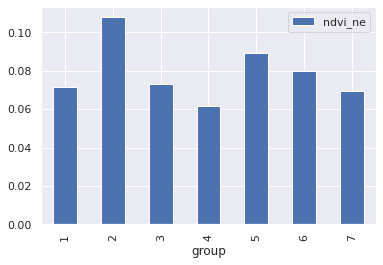

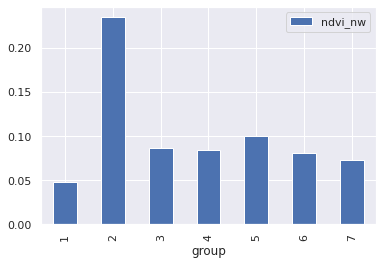

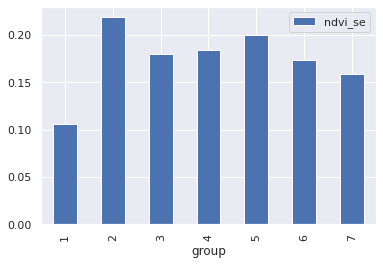

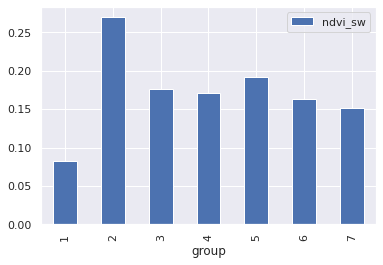

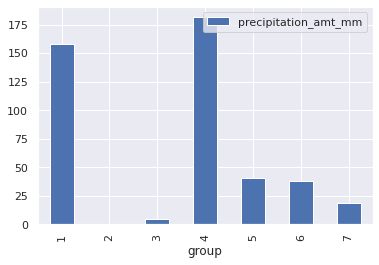

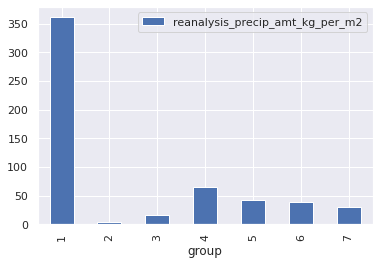

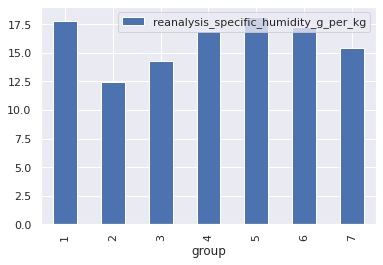

In [130]:
df['group'] = cluster_labels


columns = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_specific_humidity_g_per_kg', 'group']

res = df[columns].groupby(('group')).mean()
res.plot(kind='bar', legend=True, figsize=(12,8))
for col in columns:
    if col == 'group':
        continue
    res = df[[col, 'group']].groupby(('group')).mean()
    res.plot(kind='bar', legend=True)

In [112]:
res = df[columns].groupby('group').describe()
res

reanalysis_air_temp_k                                                \
                      count        mean       std         min         25%   
group                                                                       
1                       2.0  298.945714  0.759635  298.408571  298.677143   
2                       3.0  296.597619  0.252200  296.425714  296.452857   
3                      55.0  297.368623  0.439731  296.584286  297.115000   
4                      10.0  298.725000  1.070017  297.598571  297.912857   
5                      51.0  300.217619  0.491833  298.675714  299.982857   
6                     167.0  299.495894  0.549376  297.831429  299.135000   
7                      76.0  297.974248  0.451988  297.081429  297.617143   

                                          reanalysis_sat_precip_amt_mm  \
              50%         75%         max                        count   
group                                                                    
1      298.945714  299.214286  299.482857                          2.0   
2      296.480000  296.683571  296.887143                          3.0   
3      297.331429  297.591429  298.821429                         55.0   
4      298.355000  299.565714  300.597143                         10.0   
5      300.337143  300.575714  301.218571                         51.0   
6      299.584286  299.937143  300.517143                        167.0   
7      297.965000  298.282143  299.041429                         76.0   

                                                                           
             mean         std     min       25%      50%      75%     max  
group                                                                      
1      157.700000  121.410234   71.85  114.7750  157.700  200.625  243.55  
2        0.000000    0.000000    0.00    0.0000    0.000    0.000    0.00  
3        4.210545   12.855788    0.00    0.0000    0.000    0.000   66.05  
4      181.502000   32.442579  106.97  177.9075  184.355  200.850  223.61  
5       40.934706   36.532220    0.63   14.0600   25.940   72.930  121.65  
6       38.234132   31.871248    0.00   12.3400   32.090   59.170  142.60  
7       19.034211   26.463806    0.00    0.0000    6.795   34.465  122.27

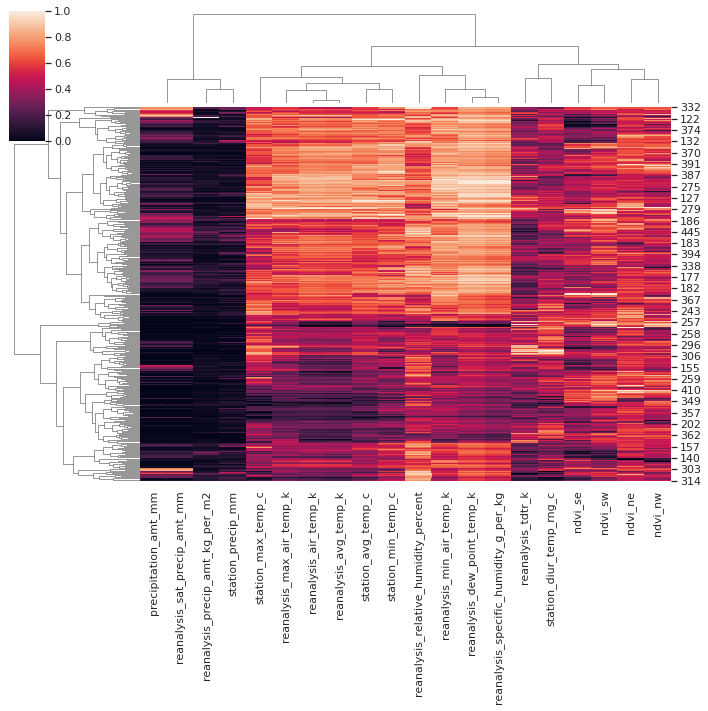

In [113]:
sns.set(color_codes=True)
sns.clustermap(df.drop("group", axis=1), standard_scale=1, method='complete')